### FireRisk AI – Predicting Fire Weather Index (FWI)

Project Description:

This project focuses on predicting the Fire Weather Index (FWI) using machine learning techniques, leveraging the Algerian Forest Fires Dataset. The dataset includes key meteorological and fire-related indices such as temperature, humidity, wind speed, and drought conditions. By performing feature engineering, exploratory data analysis (EDA), and model training, the goal is to develop an accurate predictive model for assessing wildfire risk. This project demonstrates expertise in data preprocessing, feature selection, model optimization, and performance evaluation, making it highly relevant for data science roles in climate analytics, environmental monitoring, and risk assessment. 🚀

Data Set Information:

Algerian Forest Fires Dataset
- The dataset includes 244 instances(122 instances for each region) that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

Attribute Information:
- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8 FWI Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: two classes, namely Fire and not Fire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


##### 1- Data cleaning

In [5]:
##missing values
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [6]:
df1.loc[:122,"Region"]=0
df1.loc[122:,"Region"]=1

In [7]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [8]:
df1['Region']=df1['Region'].astype(int)

In [9]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [11]:
df1=df1.dropna().reset_index()

In [12]:
df1[df1.isnull().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [13]:
df1.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df1=df1.drop(122).reset_index(drop=True)

In [15]:
df1.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [16]:
df1.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df1.drop('index',axis=1,inplace=True)

In [18]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [19]:
df1.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [20]:
#fixing spaces in the column name
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
df1.columns=df1.columns.str.strip()

In [22]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
# change the data types of columns
#int columns
df1[['month','day','year','Temperature','RH','Ws']]=df1[['month','day','year','Temperature','RH','Ws']].astype(int)

In [24]:
#float columns
obj_columns=[i for i in df1.columns if df1[i].dtype=='O']

In [25]:
obj_columns

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [26]:
for i in obj_columns:
    if i != 'Classes':
        df1[i]=df1[i].astype(float)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [28]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [29]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
# saving cleaned data set
df1.to_csv('Cleaned-Dataset_Algerian_forest_fires_dataset.csv',index=False)

In [31]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
#Since our dependant feature is FWI and not classes we can drop day month and year features

df_copy=df1.drop(['day','month','year'],axis=1)

In [33]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [35]:
df_copy['Classes']=df_copy['Classes'].str.strip()

In [36]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [37]:
#Encoding Classes feature
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df_copy[['Classes']]).toarray()

In [38]:
encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [39]:
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [40]:
encoded_df

,Classes_fire,Classes_not fire
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
238,1.0,0.0
239,0.0,1.0
240,0.0,1.0
241,0.0,1.0


In [41]:
## We can use One hot encoding to encode the classes feature but it'll increase the number of features in our dataset
## so instead we can simply encode the classes feature by np.where() clause where not fire class=1 and fire=0

In [42]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1) #np.where(df['column name']=='class name',=0,else1)

In [43]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [44]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

Exploratory Data Analysis

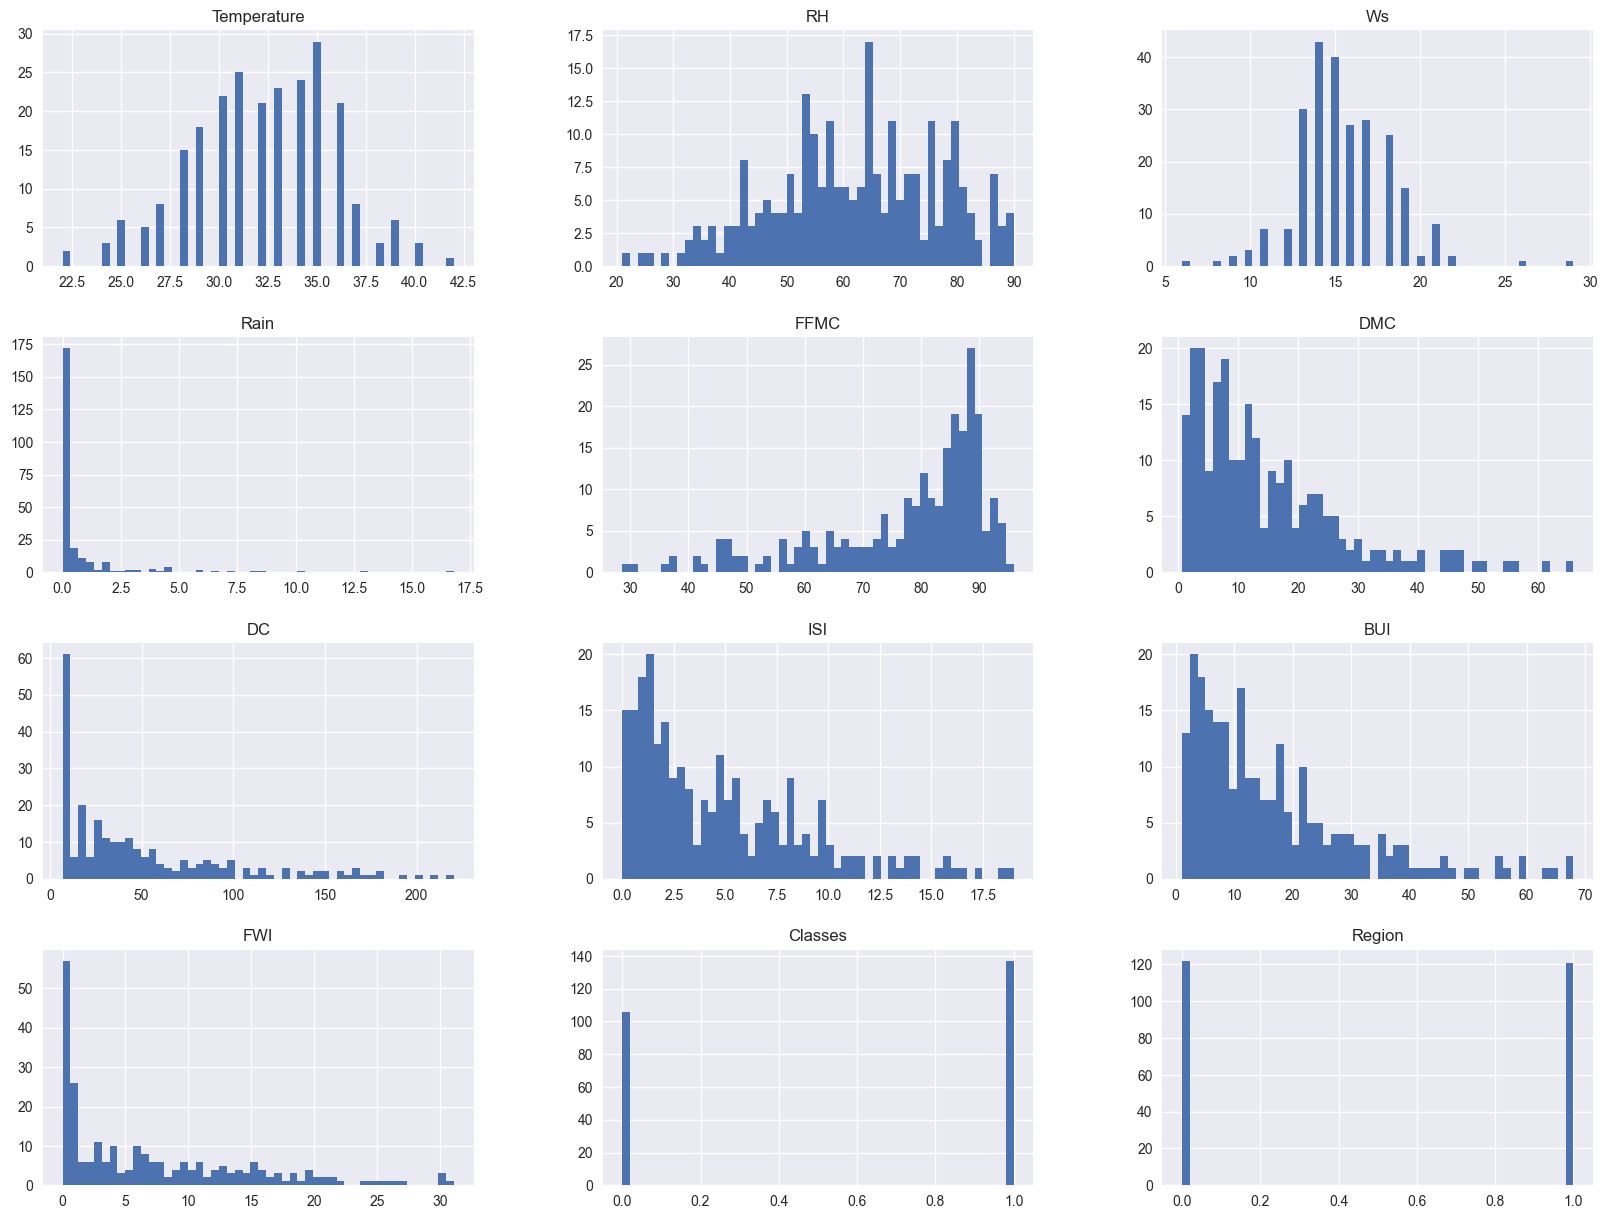

In [45]:
##Density plot for all features

plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()


Histogram Plot Conclusions-

- Temperature Distribution: 
  - The temperature values are mostly concentrated between 25°C and 40°C, with a peak around 30°C to 35°C, indicating that the dataset mainly covers warm to hot weather conditions.

- Relative Humidity (RH) Distribution: 
  - The RH values range mostly between 20% and 90%, with a concentration around 40% to 80%. This suggests a moderately humid environment, but there are instances of both low and high humidity.

- Wind Speed (Ws) Distribution: 
  - The wind speed values are mostly between 6 km/h and 30 km/h, with a peak around 10-20 km/h, indicating moderate wind conditions.

- Rainfall Distribution: 
  - The majority of rainfall values are near zero, indicating that most days had little to no rainfall. There are a few instances with higher values, but they are rare.

- Fine Fuel Moisture Code (FFMC) Distribution: 
  - The FFMC index is mostly skewed towards higher values (above 60), indicating generally dry conditions that could contribute to fire spread.

- Duff Moisture Code (DMC) Distribution: 
  - The DMC values show a skewed distribution, with most values concentrated in the lower range (below 20), suggesting limited moisture retention in the duff layer.

- Drought Code (DC) Distribution: 
  - The DC values are heavily right-skewed, with most values clustered at the lower end but a long tail extending toward high values, showing that while many days have low drought conditions, some extreme dry periods exist.

- Initial Spread Index (ISI) Distribution: 
  - The ISI values are mostly low, with most values concentrated below 10, meaning the fire spread potential is generally low but can increase under certain conditions.

- Buildup Index (BUI) Distribution: 
  - The BUI values are right-skewed, with most values below 20 but a long tail extending to higher values, indicating that while buildup conditions are generally low, there are some days with higher risk.

- Fire Weather Index (FWI) Distribution: 
  - The FWI values show a similar pattern to BUI, with most values low but some high-risk days.

- Classes Distribution: 
  - The histogram suggests a binary distribution, representing fire and non-fire events.

- Region Distribution: 
  - The dataset is balanced between the two regions (Bejaia and Sidi Bel-abbes), as seen from the nearly equal frequency of the two distinct values.

In [46]:
#Pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart Of Feature Classes')

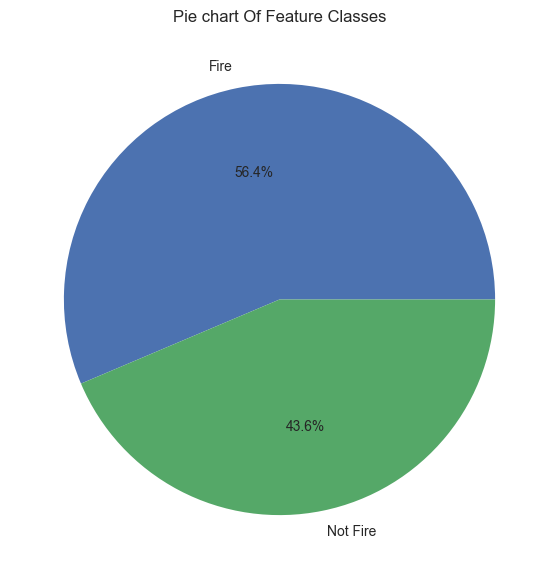

In [47]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie chart Of Feature Classes')

In [48]:
#Correlation 
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

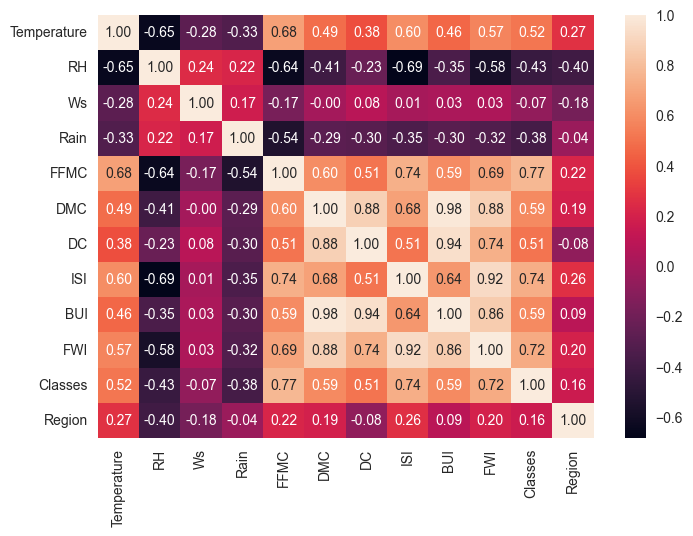

In [49]:
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

Heatmap Conclusions-

- Significant positive correlations are observed between variables like:

    - FFMC and Classes, suggesting a strong link between fine fuel moisture and fire occurrence.
    - Temperature and FWI, indicating that higher temperatures often lead to a higher fire weather index.
  
- Negative correlations are observed between RH (Relative Humidity) and fire-related variables, showing that higher humidity reduces fire risk.

- These insights confirm the role of meteorological factors (temperature, wind speed, and humidity) and FWI components in predicting fire occurrences.

<Axes: ylabel='FWI'>

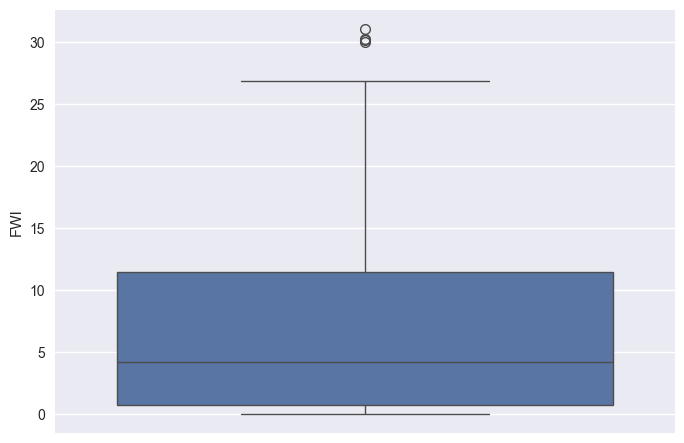

In [50]:
#box plots
sns.boxplot(df_copy['FWI'])

Box Plot Conclusions-

- The Fire Weather Index (FWI) boxplot shows a concentration of values in the lower range, indicating that most FWI values are relatively low.
- A few outliers exist in the higher range, which could represent extreme fire weather conditions that require special attention.

In [51]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [52]:
df_copy2=df1.copy()

In [53]:
df_copy2['Classes']=df_copy2['Classes'].str.strip()

In [54]:
df_copy2['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [55]:
#Monthly Fire Analysis

#region 1- Bejaia region
df_region1=df_copy2.loc[df_copy2['Region']==0]

In [56]:
#region 2- Sidi Bel-abbes region
df_region2=df_copy2.loc[df_copy2['Region']==1]

Text(0, 0.5, 'Count of Fire or No Fire')

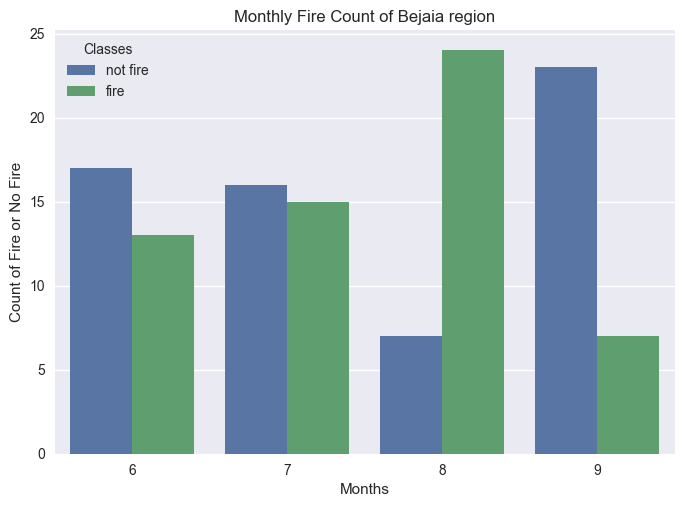

In [57]:
sns.countplot(x='month',hue='Classes',data=df_region1)
plt.title('Monthly Fire Count of Bejaia region')
plt.xlabel('Months')
plt.ylabel('Count of Fire or No Fire')

Text(0, 0.5, 'Count of Fire or No Fire')

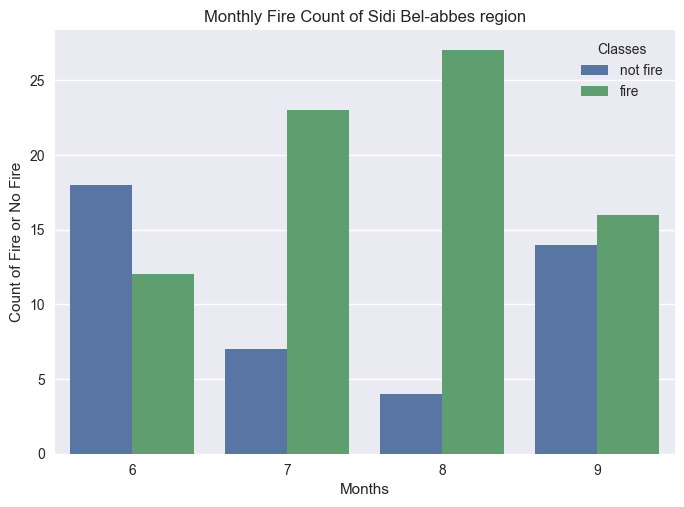

In [58]:
sns.countplot(x='month',hue='Classes',data=df_region2)
plt.title('Monthly Fire Count of Sidi Bel-abbes region')
plt.xlabel('Months')
plt.ylabel('Count of Fire or No Fire')

Count Plot Conclusions-

- Its observed that August and September had the most number of forest fires for both regions.
- From the above plot of months, we can understand that most of the forest fires happened in August and a very high forest fires count is observed in the months of June, July and August, Comparatively Lesser Forest Fires has happened in September.